**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> TELECOM CUSTOMER CHURN PREDICTION 📈</span> </center>**

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that attracting a new customer costs <span style="color:#DC143C;">five times</span> as much as keeping an existing one?</i></span> </center>

# <span style="font-family:serif; font-size:28px;"> Content</span>

1. [Business Understanding and Problem Definition](#1)
    * [What is Customer Churn?](#2)
    * [How can customer churn be reducded?](#3)
    * [Objectives](#4)
2. [Data Understanding](#5)
3. [Data Preparation](#6)
4. [Exploratory Data Analysis](#7)
    * [Demographics](#11)
    * [Customer Account Information](#12)
    * [Services Subscribed](#13)
    * [Relation between Monthly and Total charges](#14)
    * [Relation between Churn and Other Variables](#15)
5. [Model Selection and Evaluation](#8)
    * [Logistic Regression](#16)
    * [Random Forest](#17)
    * [Support Vector Machine](#18)
    * [ADA Boost](#19)
    * [XG Boost](#20)
7. [Deployment](#10)



<a id = "1" ></a>
# <span style="font-family:serif; font-size:28px;"> 1. Business Understanding and Problem Definition</span>
<a id = "Business Understanding and Problem Definition" ></a>

<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;"> Customer churn, also known as customer attrition, is when someone chooses to stop using your products or services. In effect, it’s when a customer ceases to be a customer.</span>

<span style="font-size:16px;"> Customer churn is measured using customer churn rate. That’s the number of people who stopped being customers during a set period of time, such as a year, a month, or a financial quarter.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span> 

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span> 

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span> 
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import joblib

#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

sns.set(style = 'white')

In [2]:
cust_df = pd.read_csv("Customer_Churn_Dataset.csv")

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Data Understanding</span>
<a id="loading"></a>

In [3]:
cust_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cust_df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

The data set includes information about:

- Customers who left within the last month – Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

In [5]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset contains 7043 rows and 21 columns and there seem to be no missing values in the dataset.

In [6]:
cust_df.columns.to_series().groupby(cust_df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

Here, the columns have been divided according to their data type. It can be observed that data type of "TotalCharges" is an object, which doesn't seem right as it should be numeric like "MonthlyCharges". It will be converted to numeric while preparing data.

In [7]:
cust_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The above describe method shows that the average tenure of a telecom customer is 32 months.

In [8]:
for item in cust_df.columns:
    print(item)
    print (cust_df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

Above, we can observe the range of values each column represents. There are a number of columns with binary values like "PhoneService", "PaperlessBilling", "Churn", etc.. Also, there are categorical variables like "Contract" and "Payment Method" which gives us information about whether customers are on a month-to-month rolling contract or on a fixed contract for one/two years. Also, if they are paying bills via credit card, bank transfer or electronic checks.

In [9]:
# Check target variable distribution
cust_df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Above, it can be observed that the dataset is imbalanced with high proportion of active customers compared to their churned counterparts. 

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Data Preparation</span>
<a id="Data Preparation"></a>

In [10]:
# Converting Total Charges to a numerical data type.
cust_df.TotalCharges = pd.to_numeric(cust_df.TotalCharges, errors='coerce')
cust_df.TotalCharges.dtype

dtype('float64')

In [11]:
# Checking for null values
cust_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Above output shows that there are 11 missing values for "TotalCharges". Let us replace/remove these 11 rows from our dataset.

In [12]:
# Remove missing values
cust_df.dropna(inplace = True)

# Revalidate NA's
cust_df.TotalCharges.isna().any()

False

Above, all the columns with missing values were dropped

In [13]:
# Removing "customerID" form the dataset
cust_df2 = cust_df.iloc[:, 1:]

# Converting the predictor variable to a binary numeric variable
cust_df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
cust_df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Converting all the categorical variables to dummy variables
df_dummies = pd.get_dummies(cust_df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Exploratory Data Analysis</span>
<a id="Exploratory Data Analysis"></a>

<a id = "11" ></a>
# <span style="font-family:serif; font-size:20px;"> A.) Demographics</span>
<a id = "Demographics" ></a>

Here, we will explore different demographic factors like gender, age range, partner and dependent status of the customers

#### 1. Gender Distribution

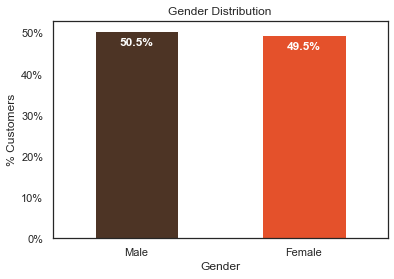

In [14]:
colors = ['#4D3425','#E4512B']
ax = (cust_df['gender'].value_counts()*100.0 /len(cust_df)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%', fontsize=12, color='white', 
            weight = 'bold')

About half of the customers in our dataset are male while other half are female

#### 2. % Senior Citizens

Text(0.5, 1.0, '% of Senior Citizens')

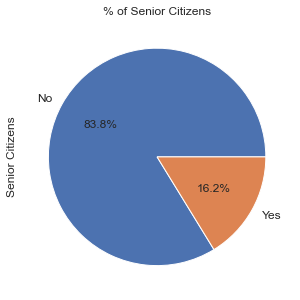

In [15]:
ax = (cust_df['SeniorCitizen'].value_counts()*100.0 /len(cust_df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],
                                                                            figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Most of the people in our dataset are younger people while 16% Senior Citizens.

#### 3. Partner and Dependent Status

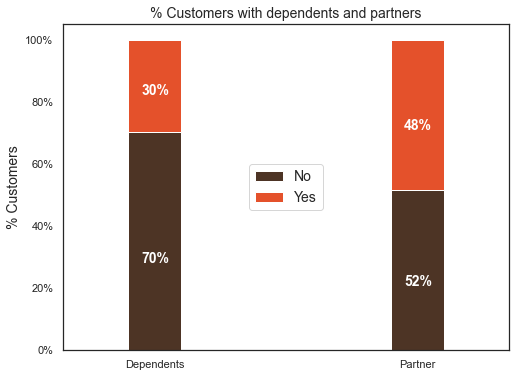

In [16]:
df2 = pd.melt(cust_df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(cust_df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors, figsize=(8,6), rot = 0, width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold', 
                size = 14)

Above, it can be observed that about 70% of the customers have dependents while 52% have partner.

<a id = "12" ></a>
# <span style="font-family:serif; font-size:20px;"> B.) Customer Account Information</span>
<a id = "Customer Account Information" ></a>

#### 1. Tenure

Text(0.5, 1.0, '# of Customers by their tenure')

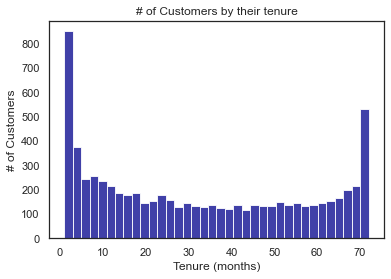

In [17]:
ax = sns.histplot(cust_df['tenure'], kde=False, bins=int(180/5), color = 'darkblue', kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

#### 2. Contracts

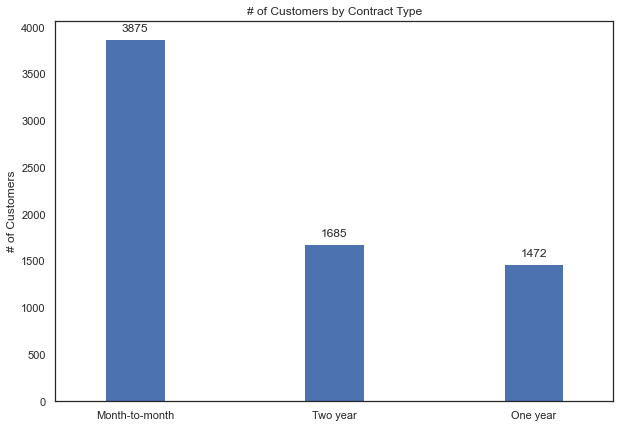

In [18]:
ax = cust_df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, figsize = (10, 7))
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        
        ax.annotate(label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)  
        
add_value_labels(ax)

It can be observed that customers with monthly subscriptions hold majority proportion while there are almost equal number of customers with annual and biannual subscriptions.

<a id = "13" ></a>
# <span style="font-family:serif; font-size:20px;"> C.) Services Subscribed</span>
<a id = "Services Subscribed" ></a>

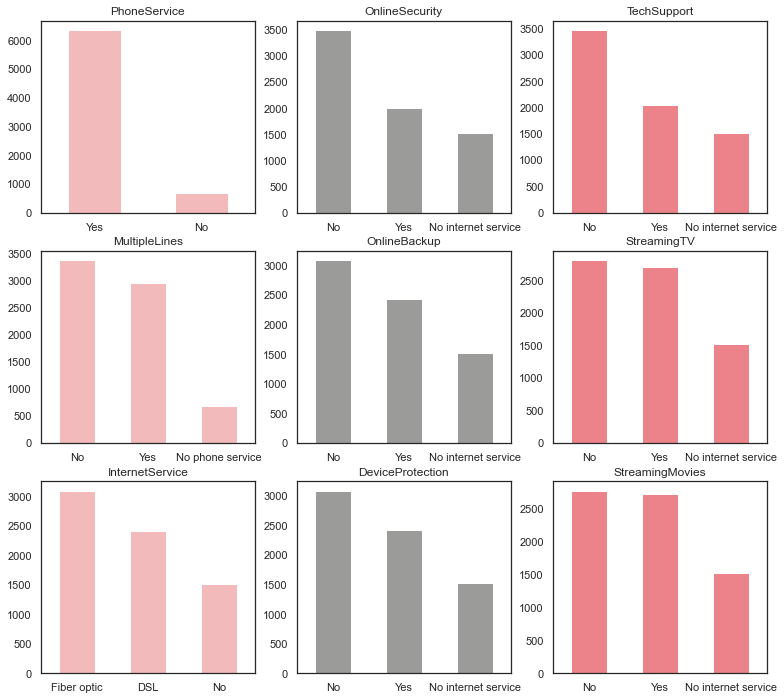

In [19]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (13,12))

for i, item in enumerate(services):
    if i < 3:
        ax = cust_df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc')
        
    elif i >=3 and i < 6:
        ax = cust_df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color ='#9b9c9a')
        
    elif i < 9:
        ax = cust_df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2], rot = 0, color = '#ec838a')
        
    ax.set_title(item)

- Most of the customers have phone service out of which almost half of the customers have multiple lines.
- Most of the customers have phone service out of which almost half of the customers have multiple lines.
- Customers who have availed Online Backup, Device Protection, Technical Support and Online Security features are a minority.

<a id = "14" ></a>
# <span style="font-family:serif; font-size:20px;"> D.) Relation between Monthly and Total charges</span>
<a id = "Relation between Monthly and Total charges" ></a>

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

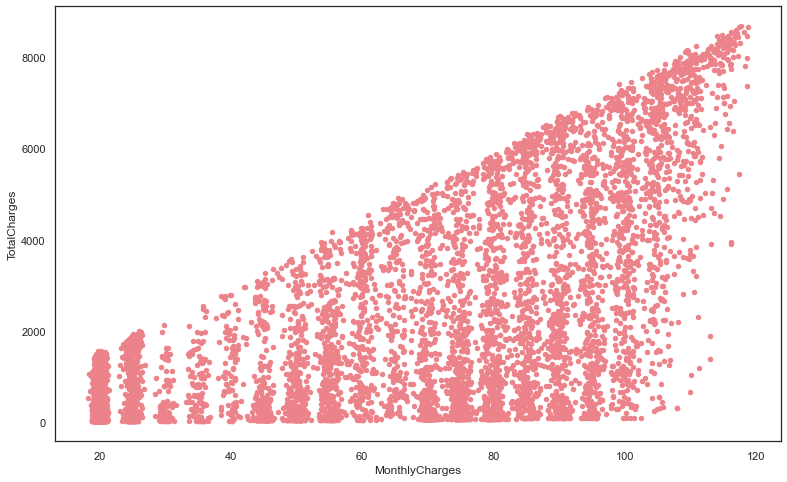

In [20]:
cust_df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y = 'TotalCharges', color =  '#ec838a', 
                                                         figsize = (13, 8))

<a id = "15" ></a>
# <span style="font-family:serif; font-size:20px;"> E.) Relation between Churn and Other Variables</span>
<a id = "Relation between Churn and Other Variables" ></a>

#### 1. Churn vs Tenure

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

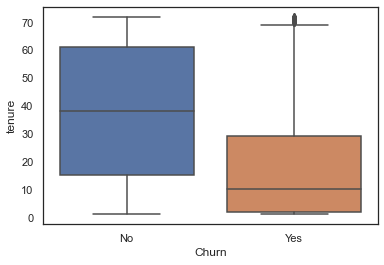

In [21]:
sns.boxplot(x = cust_df.Churn, y = cust_df.tenure)

Above, it can be observed that the customers who do not churn have a higher tenure which is obvious.

#### 2. Churn by Contract Type

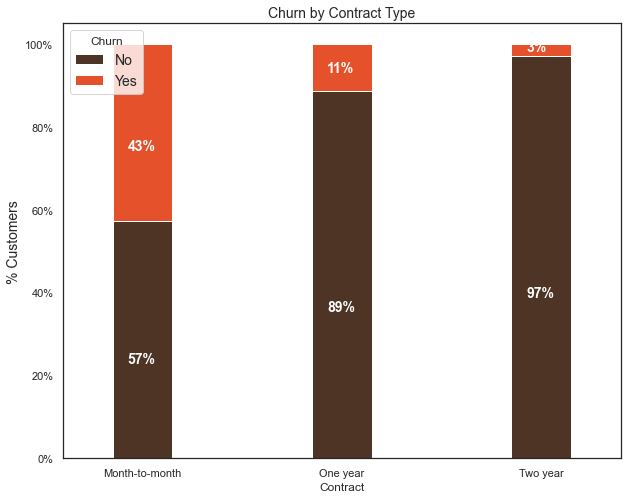

In [22]:
colors = ['#4D3425','#E4512B']
contract_churn = cust_df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, 
                                                              figsize = (10,8), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Customers with monthly subscription have a very high churn rate.

#### 3. Churn by Seniority

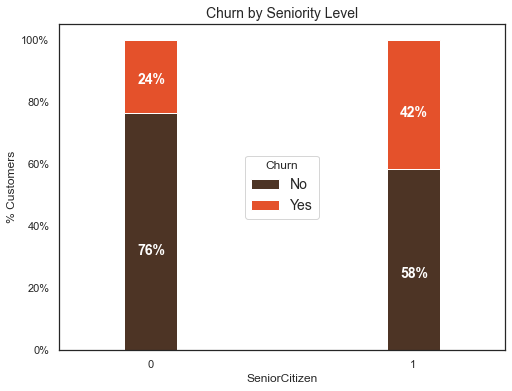

In [23]:
colors = ['#4D3425','#E4512B']
seniority_churn = cust_df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Senior citizens churn more than their younger counterparts.

#### 4. Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

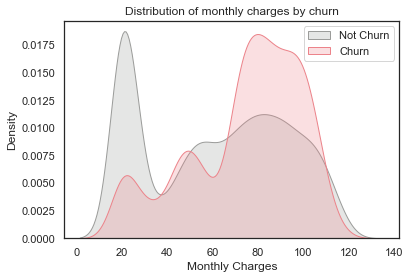

In [24]:
ax = sns.kdeplot(cust_df.MonthlyCharges[(cust_df["Churn"] == 'No') ], color="#9b9c9a", shade = True)
ax = sns.kdeplot(cust_df.MonthlyCharges[(cust_df["Churn"] == 'Yes') ], ax =ax, color="#ec838a", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Higher % of customers churn when monthly charges are high.

#### 5. Churn by Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

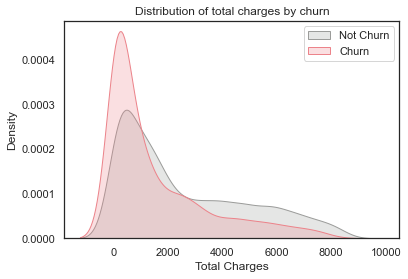

In [25]:
ax = sns.kdeplot(cust_df.TotalCharges[(cust_df["Churn"] == 'No') ], color="#9b9c9a", shade = True)
ax = sns.kdeplot(cust_df.TotalCharges[(cust_df["Churn"] == 'Yes') ], ax =ax, color="#ec838a", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

Churn is higher when TotalCharges are lower.

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Model Selection and Evaluation</span>
<a id="Model Selection and Evaluation"></a>

<a id = "16" ></a>
# <span style="font-family:serif; font-size:20px;"> A.) Logistic Regression</span>
<a id = "Logistic Regression" ></a>

In [26]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Above, we separated response variable from independent variables. Also, we scaled the variables so that all of them are within a range of 0 and 1.

In [27]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [29]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


AxesSubplot(0.125,0.125;0.775x0.755)


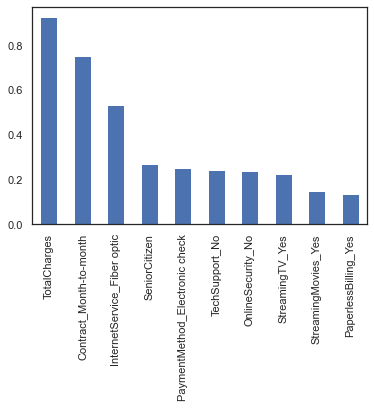

In [30]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


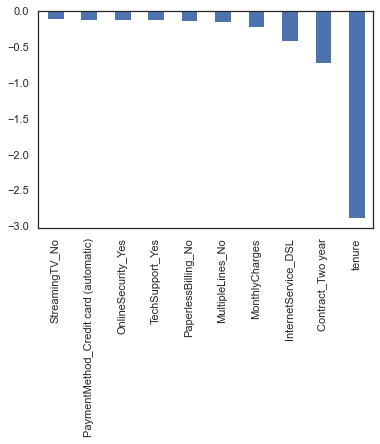

In [31]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

It can be seen that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

- As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
- Having DSL internet service also reduces the proability of Churn
- Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.

<a id = "17" ></a>
# <span style="font-family:serif; font-size:20px;"> B.) Random Forest</span>
<a id = "Random Forest" ></a>

In [32]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


<AxesSubplot:>

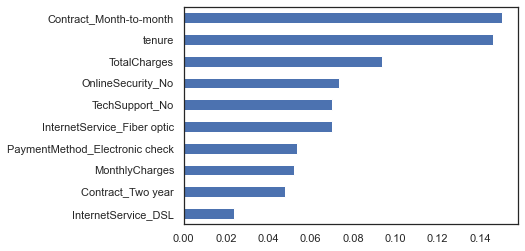

In [33]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Observations:
- From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
- The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

<a id = "18" ></a>
# <span style="font-family:serif; font-size:20px;"> C.) Support Vector Machine</span>
<a id = "Support Vector Machine" ></a>

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [35]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear') 
model_svm.fit(X_train,y_train)
preds = model_svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [36]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[953  89]
 [164 201]]


With SVM, the accuracy was increased upto 82%. 

<a id = "19" ></a>
# <span style="font-family:serif; font-size:20px;"> D.) ADA Boost</span>
<a id = "ADA Boost" ></a>

In [37]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

<a id = "20" ></a>
# <span style="font-family:serif; font-size:20px;"> E.) XG Boost</span>
<a id = "XG Boost" ></a>

In [38]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8095238095238095

Here, we can see that SVM is the clear winner with an accuracy of 82%.

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Model Deployment</span>
<a id="Model Deployment"></a>

In [39]:
filename = 'final_model.model'
i = [model_svm]
joblib.dump(i,filename)

['final_model.model']

# Conclusion

Overall, we got a lot of important insights about Customer churn data and finally we were able to build a machine learning classifier which predicts whether a customer will churn or not with an accuracy of around 82%.